Importing the necessary libraries and loading in the dataset.

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn xgboost

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.neural_network import MLPClassifier


# Load the dataset (update the path if necessary)
dataset = 'airline_passenger_satisfaction.csv'
df = pd.read_csv(dataset)

In [ ]:
# Check the first few rows
print(df.head())
# Check data types and non-null values
print(df.info())
# Check for basic statistics of numerical columns
print(df.describe())

   ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business              821   
1   2  Female   35     Returning       Business  Business              821   
2   3    Male   41     Returning       Business  Business              853   
3   4    Male   50     Returning       Business  Business             1905   
4   5  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   ...  On-board Service  Seat Comfort  Leg Room Service  Cleanlines

Dropping the rows with missing values.

In [ ]:
# Remove rows with missing 'Arrival Delay' without modifying the original DataFrame in place
df_cleaned = df.dropna(subset=['Arrival Delay'])

# Verify removal
print(df_cleaned.isnull().sum())

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [ ]:
# Summary statistics for numerical features
print(df_cleaned.describe())

                  ID            Age  Flight Distance  Departure Delay  \
count  129487.000000  129487.000000    129487.000000    129487.000000   
mean    64958.335169      39.428761      1190.210662        14.643385   
std     37489.781165      15.117597       997.560954        37.932867   
min         1.000000       7.000000        31.000000         0.000000   
25%     32494.500000      27.000000       414.000000         0.000000   
50%     64972.000000      40.000000       844.000000         0.000000   
75%     97415.500000      51.000000      1744.000000        12.000000   
max    129880.000000      85.000000      4983.000000      1592.000000   

       Arrival Delay  Departure and Arrival Time Convenience  \
count  129487.000000                           129487.000000   
mean       15.091129                                3.057349   
std        38.465650                                1.526787   
min         0.000000                                0.000000   
25%         0.000000  

Creating plots to gain insights into the typical profile of a satisfied customer compared to a neutral or dissatisfied customer.

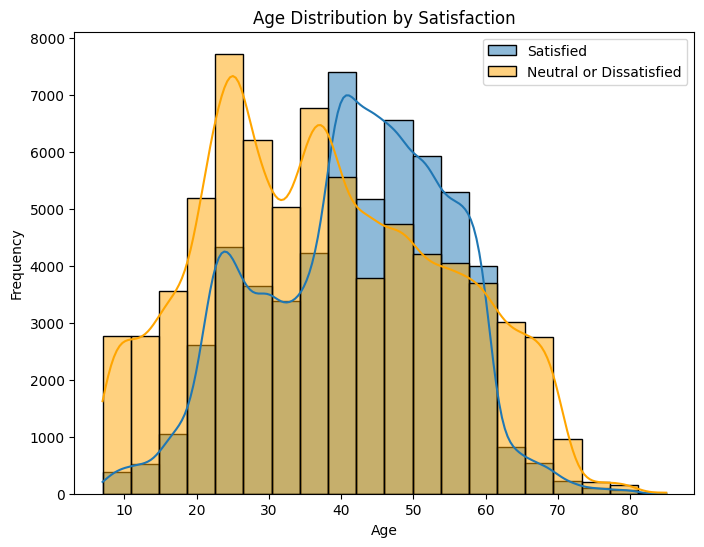

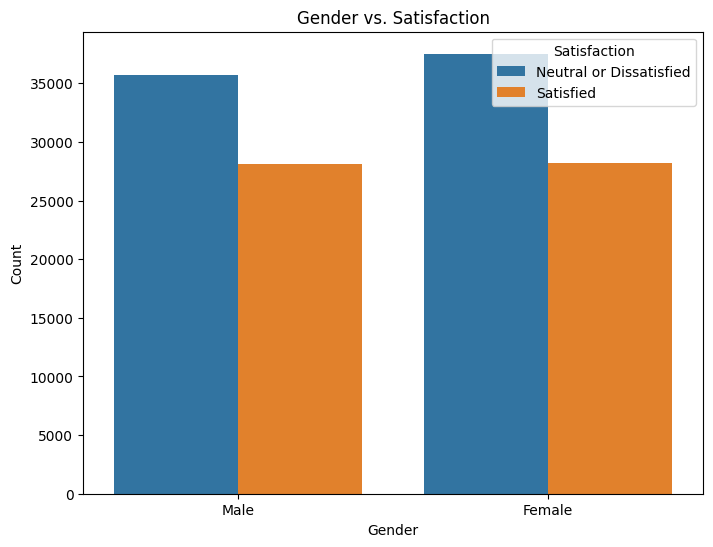

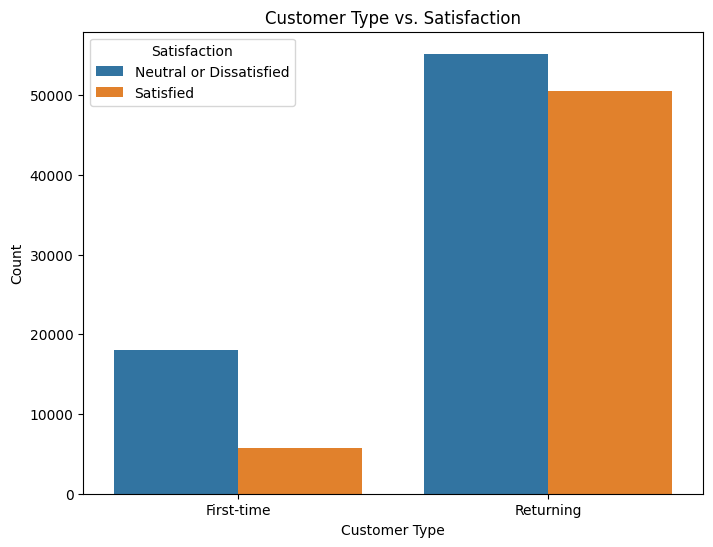

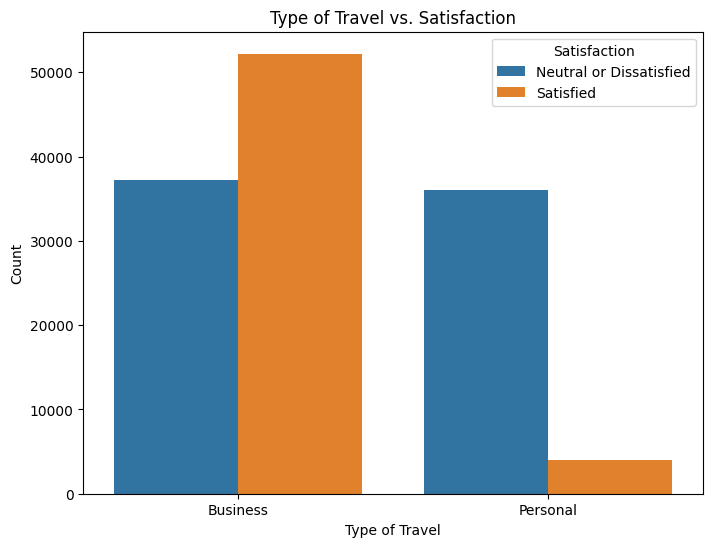

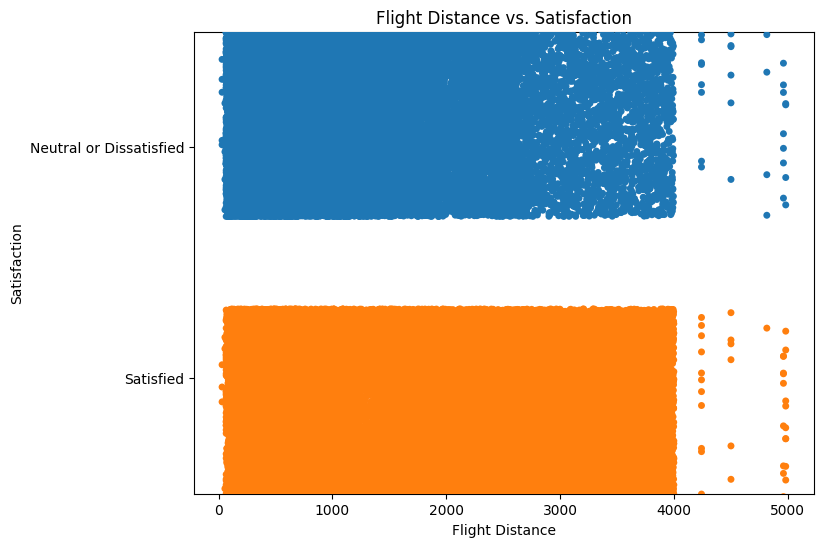

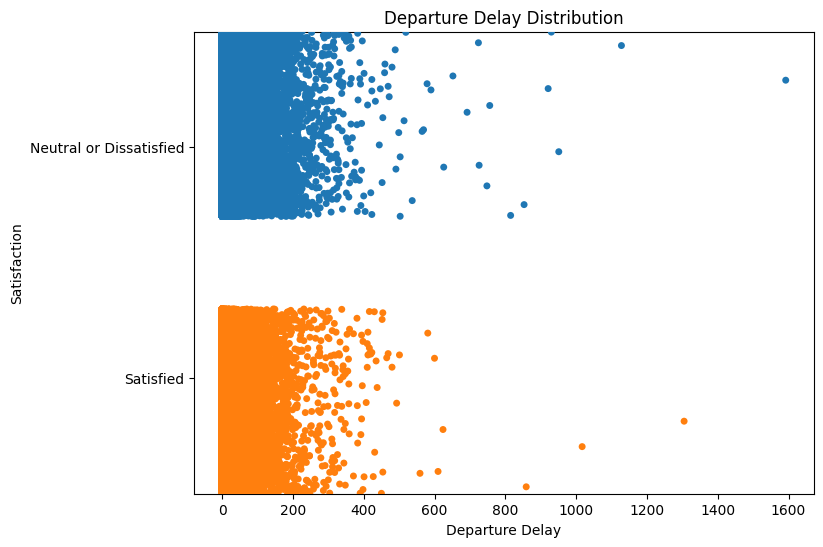

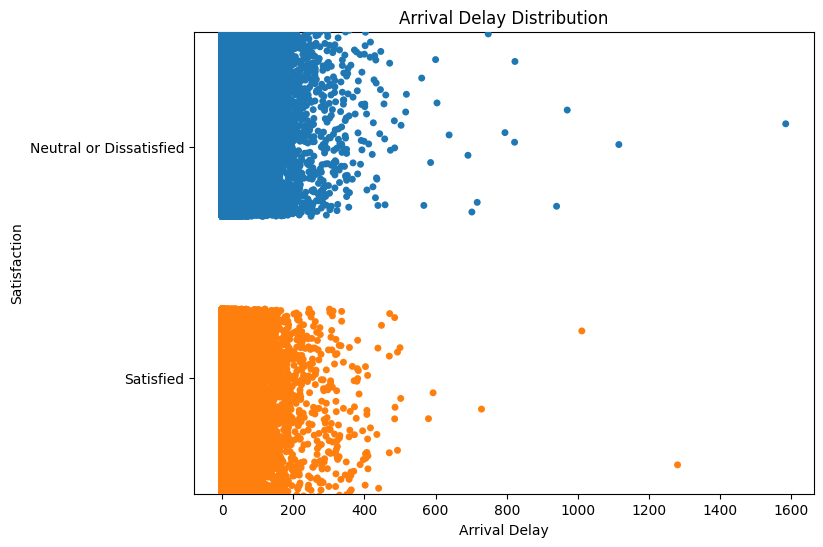

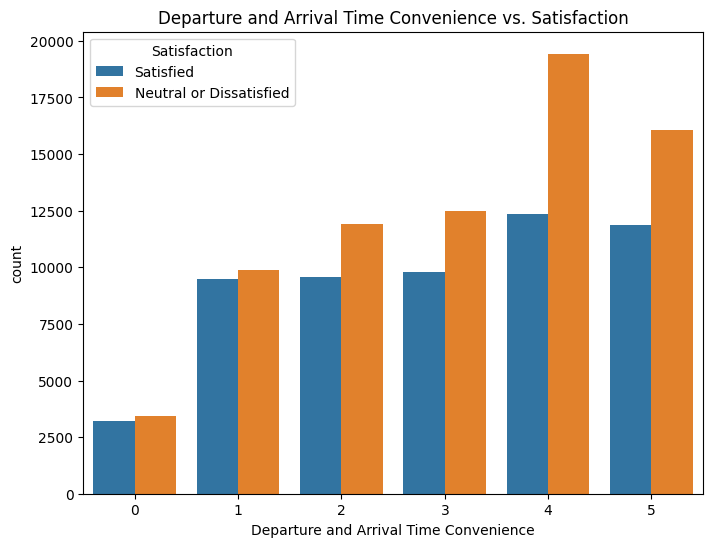

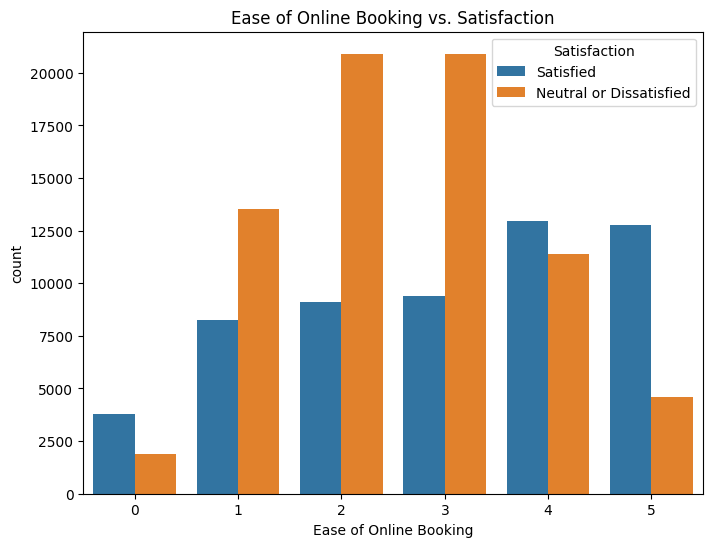

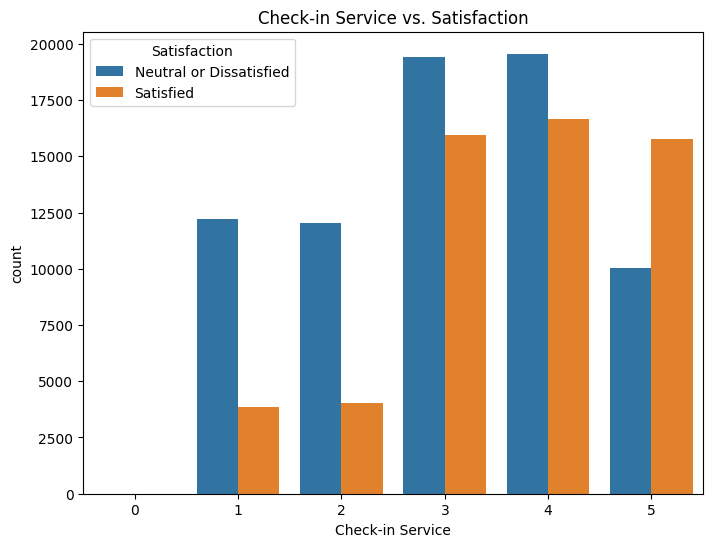

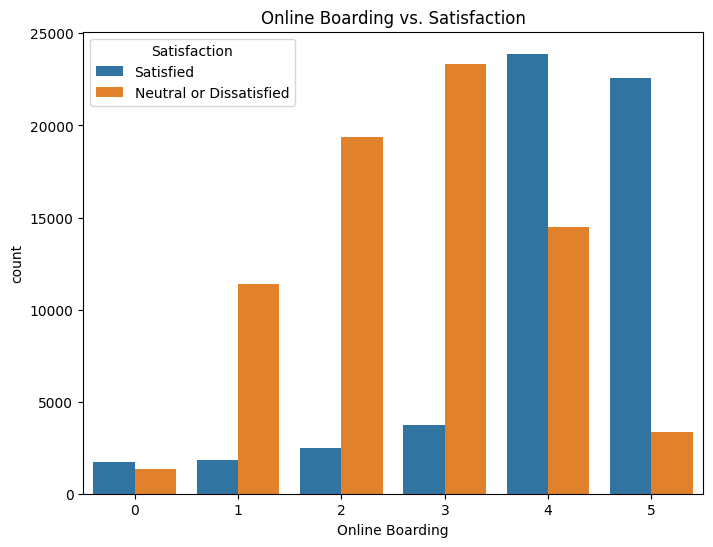

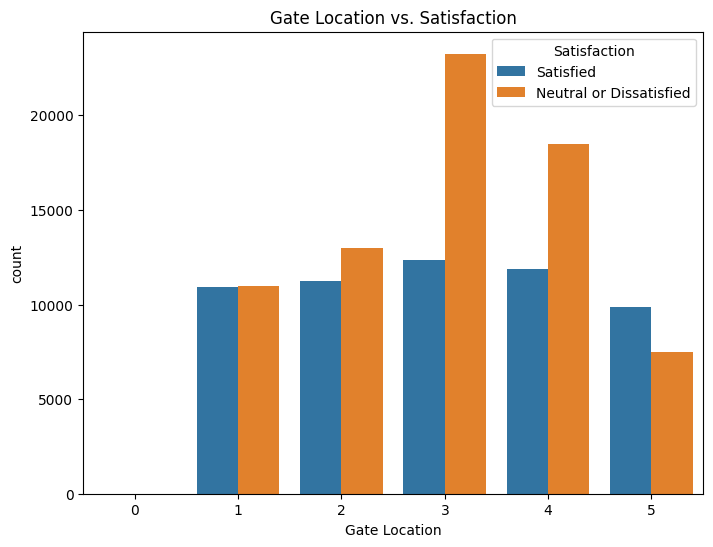

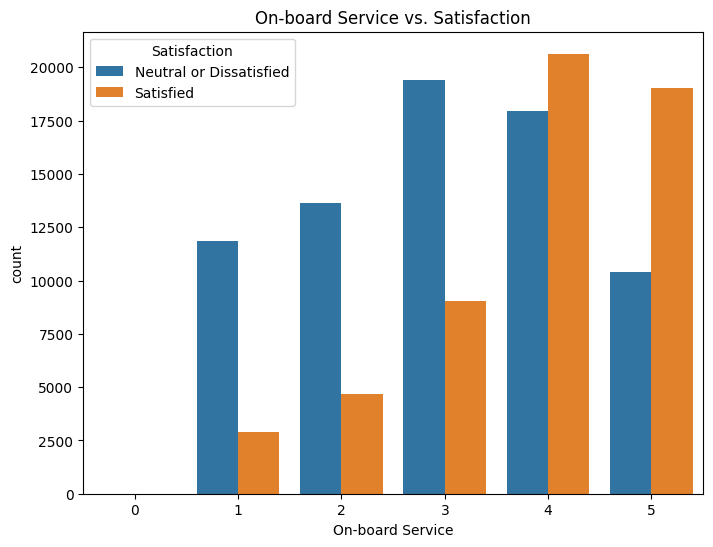

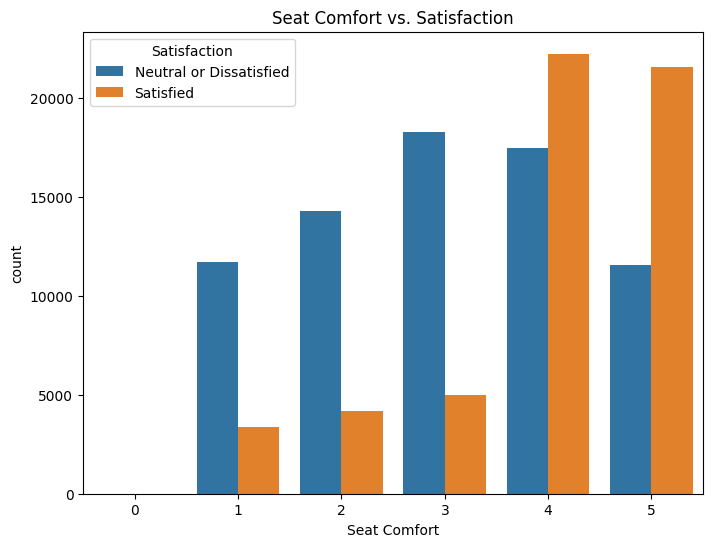

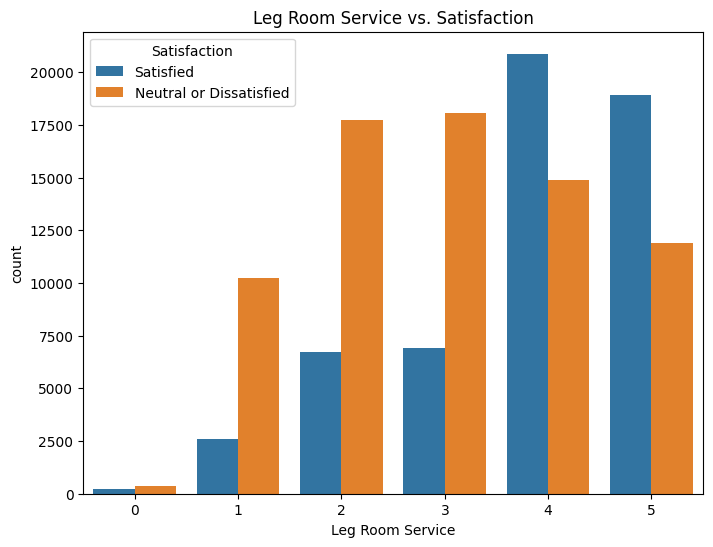

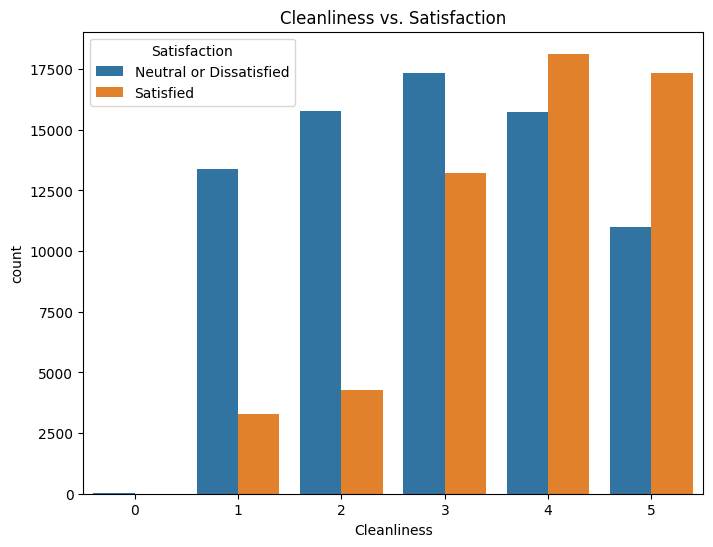

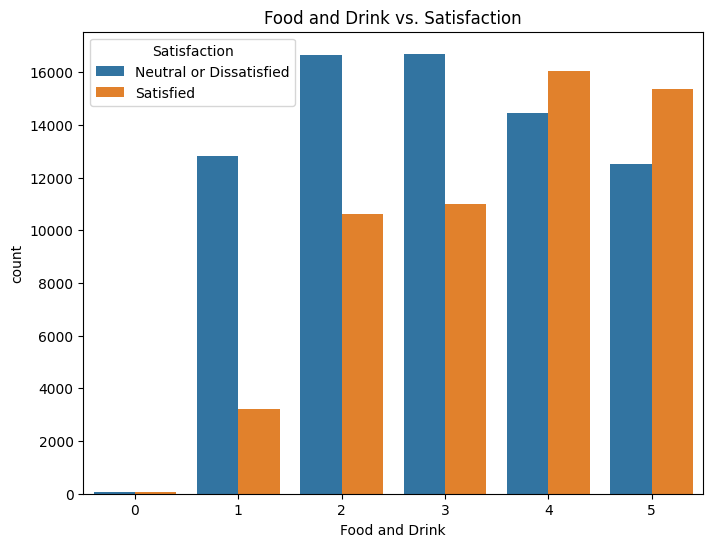

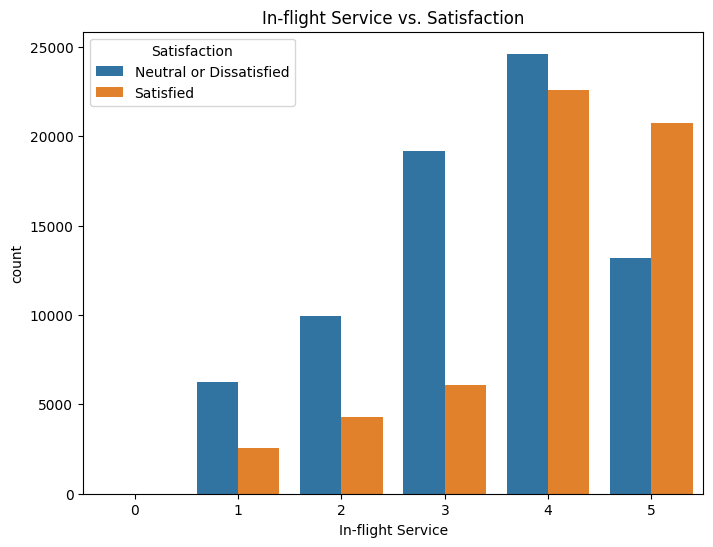

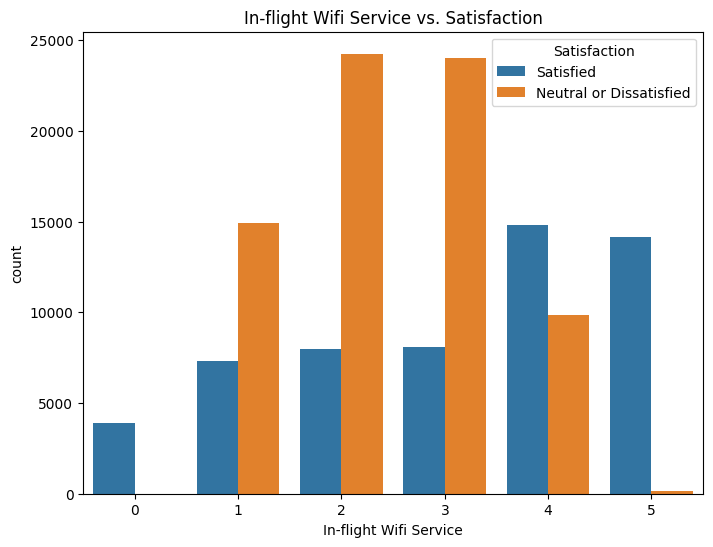

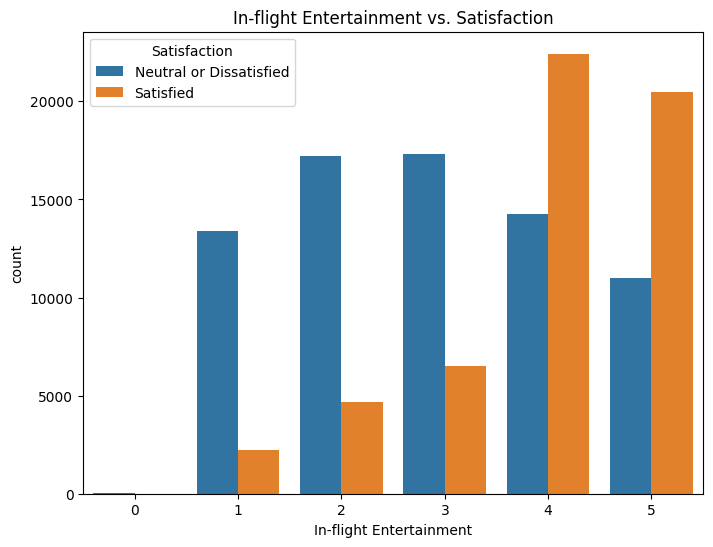

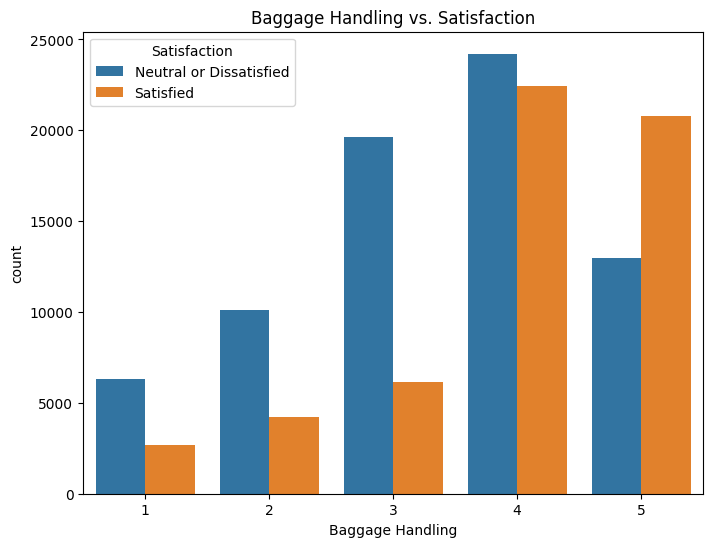

In [ ]:
# difference in age distribution between satisfied and dissatisfied customers
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned[df_cleaned['Satisfaction'] == 'Satisfied']['Age'],bins =20, kde=True, label='Satisfied')
sns.histplot(df_cleaned[df_cleaned['Satisfaction'] == 'Neutral or Dissatisfied']['Age'],bins=20, kde=True, label='Neutral or Dissatisfied', color='orange')
plt.title('Age Distribution by Satisfaction')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# gender plot
plt.figure(figsize=(8,6))
sns.countplot(x='Gender', hue='Satisfaction', data=df_cleaned)
plt.title('Gender vs. Satisfaction')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# relationship between customer type and satisfaction
plt.figure(figsize=(8,6))
sns.countplot(x='Customer Type', hue='Satisfaction', data=df_cleaned)
plt.title('Customer Type vs. Satisfaction')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

# Type of Travel satisfaction levels
plt.figure(figsize=(8,6))
sns.countplot(x='Type of Travel', hue='Satisfaction', data=df_cleaned)
plt.title('Type of Travel vs. Satisfaction')
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.show()

# Flight Distance vs. Satisfaction
plt.figure(figsize=(8, 6))
sns.stripplot(x='Flight Distance', y='Satisfaction', data=df_cleaned, jitter=1, dodge=True, hue='Satisfaction')
plt.title('Flight Distance vs. Satisfaction')
plt.xlabel('Flight Distance')
plt.ylabel('Satisfaction')
plt.show()

# Departure Delay
plt.figure(figsize=(8, 6))
sns.stripplot(x='Departure Delay', y='Satisfaction', data=df_cleaned, jitter=1, dodge=True, hue='Satisfaction')
plt.title('Departure Delay Distribution')
plt.show()

# Arrival Delay
plt.figure(figsize=(8, 6))
sns.stripplot(x='Arrival Delay', y='Satisfaction', data=df_cleaned, jitter=1, dodge=True, hue='Satisfaction')
plt.title('Arrival Delay Distribution')
plt.show()


# Analyze the impact of service ratings on satisfaction
service_columns = ['Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service',
                  'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service',
                  'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
                  'In-flight Entertainment', 'Baggage Handling']

for col in service_columns:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=col, hue='Satisfaction', data=df_cleaned)
  plt.title(f'{col} vs. Satisfaction')
  plt.show()

For example we learned that the personal type of travel has a lot more neutral or disssatisfied customers than satisfied customers and business travel has more satisfied customers than neutral or dissatisfied. We also learned that people between 40-60 years old tend to have a more satisfied customer experience and younger people tend to be more neutral or dissatisfied. We also learned that first time customers tend to have a moré neutral or dissatisfied customer experience.

As we have explored the dataset thoroughly and visualized key patterns, we can transition into the modeling pipeline step by step.

Step 1: Data Preparation for Modeling

Converting target variable, encoding Satisfaction column as a binary variable.

In [ ]:
df_cleaned['Satisfaction'] = df_cleaned['Satisfaction'].map({'Satisfied': 1, 'Neutral or Dissatisfied': 0})

<ipython-input-20-6c723d87119f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Satisfaction'] = df_cleaned['Satisfaction'].map({'Satisfied': 1, 'Neutral or Dissatisfied': 0})


Converting categorical features into numerical representations

In [ ]:
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

Separating features and targets, splitting the dataset into X (features) and y (target variable)

In [ ]:
X = df_encoded.drop('Satisfaction', axis=1)
y = df_encoded['Satisfaction']

Splitting data, Create training and testing datasets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Step 2: Training and Evaluating Logistic Regression

Training a Logistic Regression model on the training set

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Now, fit the Logistic Regression model on the scaled data
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [ ]:
# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy = log_reg.score(X_test_scaled, y_test)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8762
Confusion Matrix:
[[13241  1404]
 [ 1802  9451]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     14645
           1       0.87      0.84      0.85     11253

    accuracy                           0.88     25898
   macro avg       0.88      0.87      0.87     25898
weighted avg       0.88      0.88      0.88     25898



Plotting the ROC Curve for Logistic Regression

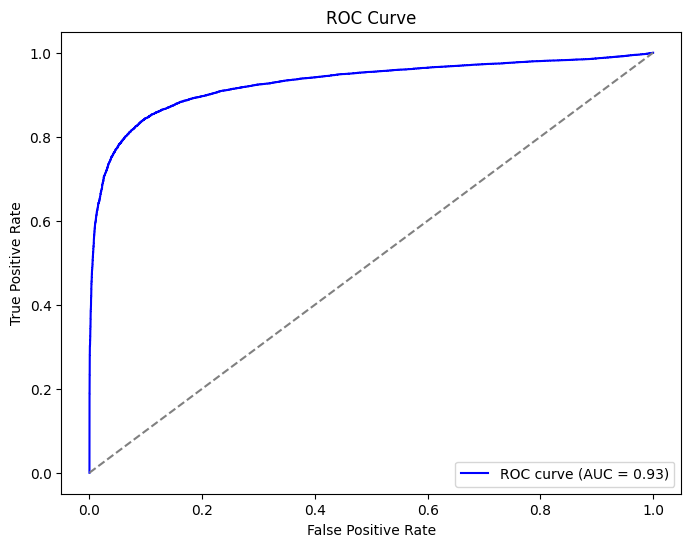

In [ ]:
# Get predicted probabilities for the positive class (Satisfaction = 1)
y_probs = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

Trying Hyperparameter Tuning to find the best combination of settings (hyperparameters) for a model to improve its performance. Seeing if we can further improve the models performance.

In [ ]:
# Define the hyperparameters grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Optimization algorithms
    'max_iter': [100, 200, 500]  # Number of iterations for optimization
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters: ", best_params)
print("Best Cross-Validation Accuracy: ", best_score)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Hyperparameters:  {'C': 0.01, 'max_iter': 100, 'solver': 'liblinear'}
Best Cross-Validation Accuracy:  0.8747647200222632


Re-initializing Logistic Regression with the best hyperparameters

In [ ]:
# Re-initialize Logistic Regression with the best hyperparameters
best_log_reg = LogisticRegression(C=0.01, max_iter=100, solver='liblinear', random_state=42)

# Train the model on the scaled training data
best_log_reg.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred_best = best_log_reg.predict(X_test_scaled)

# Calculate accuracy and other metrics
from sklearn.metrics import accuracy_score, classification_report

# Accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)

# Classification Report
report_best = classification_report(y_test, y_pred_best)

print("Accuracy with Best Hyperparameters: ", accuracy_best)
print("Classification Report with Best Hyperparameters:\n", report_best)

Accuracy with Best Hyperparameters:  0.8764383350065642
Classification Report with Best Hyperparameters:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     14645
           1       0.87      0.84      0.86     11253

    accuracy                           0.88     25898
   macro avg       0.88      0.87      0.87     25898
weighted avg       0.88      0.88      0.88     25898



Re-fitting the model with the best hyperparameters

In [ ]:
# Re-fit the model with the best hyperparameters
log_reg = LogisticRegression(C=0.01, max_iter=100, solver='liblinear', random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01, random_state=42, solver='liblinear')

ROC Curve for Logistic Regression with Best Hyperparameters

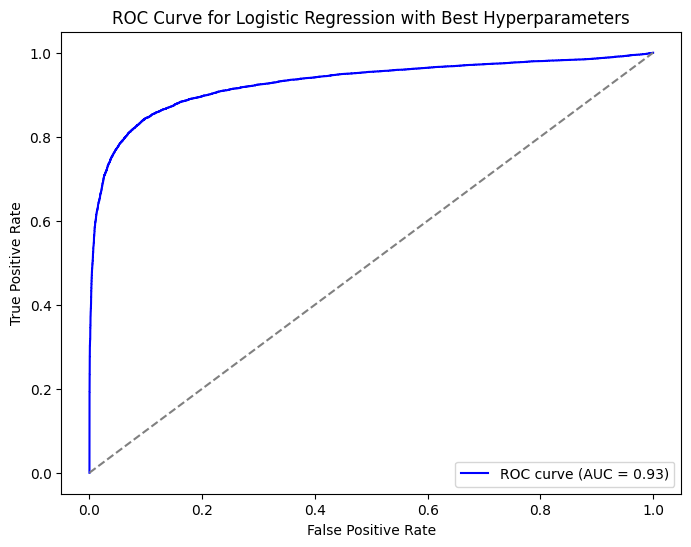

In [ ]:
# Get the predicted probabilities for the positive class (class 1)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression with Best Hyperparameters')
plt.legend(loc='lower right')
plt.show()

Random Forest Classifier

Training the Random Forest Classifier

In [ ]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Accuracy: ", accuracy_rf)
print("Classification Report:\n", report_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

Accuracy:  0.9635493088269365
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14645
           1       0.97      0.94      0.96     11253

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898

Confusion Matrix:
 [[14348   297]
 [  647 10606]]


Feature Scaling Using StandardScaler, We use feature scaling to normalize the range of the feature values. This is important because many machine learning algorithms, like Logistic Regression, K-Nearest Neighbors, and Support Vector Machines, are sensitive to the scale of input features. Without scaling, features with larger ranges could dominate the learning process, leading to poor model performance. StandardScaler standardizes the features by transforming them to have a mean of 0 and a standard deviation of 1

In [ ]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

Support Vector Machine (SVM)

In [ ]:
# Initialize the SVM model
svm_model = SVC(random_state=42, probability=True)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f"Accuracy of SVM: {accuracy_svm:.4f}")
print("SVM Classification Report:\n", report_svm)

Accuracy of SVM: 0.9554
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     14645
           1       0.96      0.94      0.95     11253

    accuracy                           0.96     25898
   macro avg       0.96      0.95      0.95     25898
weighted avg       0.96      0.96      0.96     25898



Gradient Boosting Machine (GBM)

In [ ]:
# Initialize the Gradient Boosting model
gbm_model = GradientBoostingClassifier(random_state=42)

# Train the model
gbm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_gbm = gbm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
report_gbm = classification_report(y_test, y_pred_gbm)

print(f"Accuracy of GBM: {accuracy_gbm:.4f}")
print("GBM Classification Report:\n", report_gbm)

Accuracy of GBM: 0.9433
GBM Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     14645
           1       0.95      0.92      0.93     11253

    accuracy                           0.94     25898
   macro avg       0.94      0.94      0.94     25898
weighted avg       0.94      0.94      0.94     25898



In [ ]:
# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print(f"Accuracy of KNN: {accuracy_knn:.4f}")
print("KNN Classification Report:\n", report_knn)

Accuracy of KNN: 0.9290
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     14645
           1       0.95      0.88      0.92     11253

    accuracy                           0.93     25898
   macro avg       0.93      0.92      0.93     25898
weighted avg       0.93      0.93      0.93     25898



In [ ]:
# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print(f"Accuracy of Naive Bayes: {accuracy_nb:.4f}")
print("Naive Bayes Classification Report:\n", report_nb)

Accuracy of Naive Bayes: 0.8616
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88     14645
           1       0.86      0.82      0.84     11253

    accuracy                           0.86     25898
   macro avg       0.86      0.86      0.86     25898
weighted avg       0.86      0.86      0.86     25898



In [ ]:
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print(f"Accuracy of XGBoost: {accuracy_xgb:.4f}")
print("XGBoost Classification Report:\n", report_xgb)

Accuracy of XGBoost: 0.9643
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14645
           1       0.97      0.95      0.96     11253

    accuracy                           0.96     25898
   macro avg       0.97      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



In [ ]:
# Initialize the neural network model
nn_model = MLPClassifier(random_state=42, max_iter=500)

# Train the model
nn_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_nn = nn_model.predict(X_test_scaled)

# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
report_nn = classification_report(y_test, y_pred_nn)

print(f"Accuracy of Neural Network: {accuracy_nn:.4f}")
print("Neural Network Classification Report:\n", report_nn)

Accuracy of Neural Network: 0.9572
Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     14645
           1       0.95      0.95      0.95     11253

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



Conclusion about the best machine learning model:

**Best Model**: XGBoost (highest accuracy and excellent F1-scores for both classes)

**Close Second**: Random Forest (almost identical performance to      XGBoost)
* If computational efficiency is a concern, Random Forest might be preferable, as it’s generally faster to train than XGBoost. However, for maximum performance, XGBoost is the winner
